# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [168]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('verynice.csv')
# returns the first 5 rows
df.head()

,PTS,FG,FGA,FT,FTA,OREB,DREB,AST,TOV,STL,BLK,PF,GS
0,33.8,30.6,9.8,37.1,9.6,81.4,2.1,11.7,4.2,3.1,1.1,1.5,115.05
1,37.2,30.3,11.4,35.9,8.3,75.6,1.1,8.2,6.2,3.5,1.3,1.1,109.14
2,32.9,29.9,10.3,29.3,7.2,72.2,2.0,11.6,5.8,3.3,1.1,1.4,103.46
3,37.2,29.9,10.5,38.3,6.9,91.0,0.5,7.4,6.4,3.5,0.9,0.9,120.77
4,35.4,28.4,9.9,35.3,6.8,74.4,0.9,9.1,8.7,4.5,1.2,0.6,106.35


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [170]:
df.shape
#1898 rows and 9 columns

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [171]:
# Use info() to print a concise summary of the DataFrame
df.info()
# data types are either floats, ints, or objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [172]:
# Write your code here
df.eq('Not given').sum()
df.replace('Not given', np.nan, inplace = True)
#Missing values in rating replaced with nulls

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [173]:
# Write your code here
df.describe()
#Minium is 20 mins, maximum is 35 mins, average is 27.37 mins

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated?

In [174]:
# Write the code here
df.isnull().sum()
#736 ratings are not given

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [24]:
# Write the code here
df['order_id'].nunique()
#Order id's are all unique

1898

In [25]:
df['customer_id'].nunique() 
#1200 customers in total

1200

In [26]:
df['restaurant_name'].nunique()
#178 different restaurants in total

178

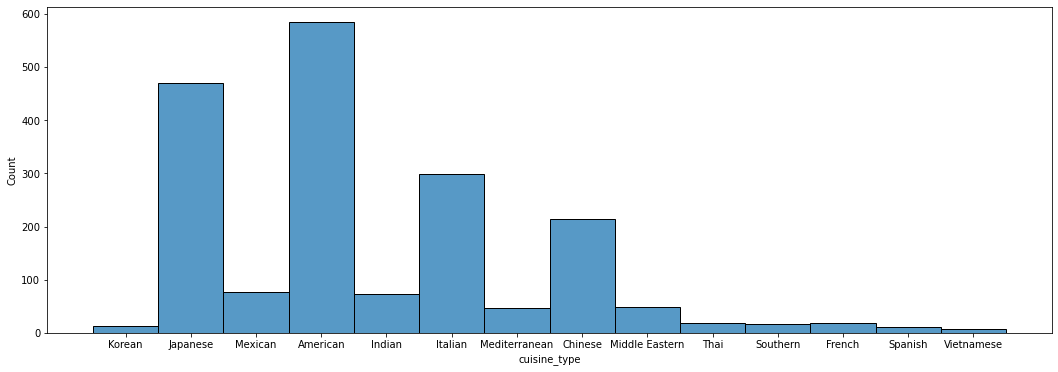

In [130]:
df['cuisine_type'].nunique()
#14 cuisine types
plt.figure(figsize = (18,6))
sns.histplot(data = df, x = 'cuisine_type')
plt.show()
#Visually you can see the frequency of each cuisine type

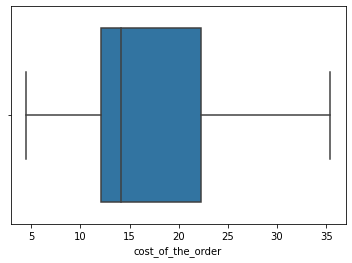

In [129]:
#Cost of the Order
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 
#Shows a  visual respresentatio of where the median, upper and lower quartiler,and spread of the order costs

<AxesSubplot:xlabel='day_of_the_week', ylabel='Count'>

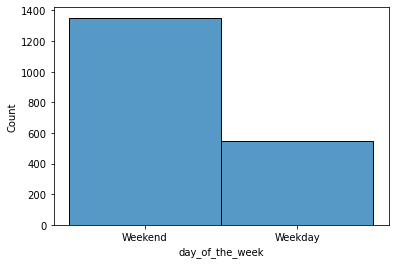

In [133]:
sns.histplot(data = df, x = 'day_of_the_week')
#Shows the frequency of weekend vs weekday orders

<AxesSubplot:xlabel='rating', ylabel='count'>

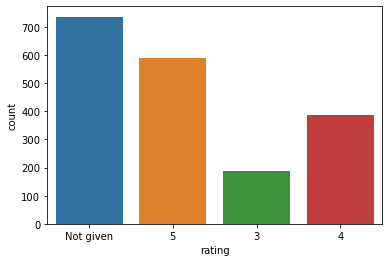

In [134]:
sns.countplot(data = df, x = 'rating')
#Shows a visual of the frequency of all the ratings given

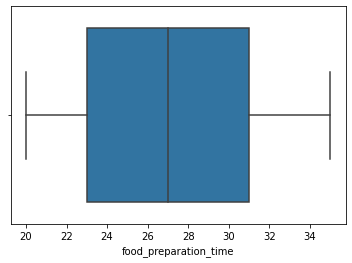

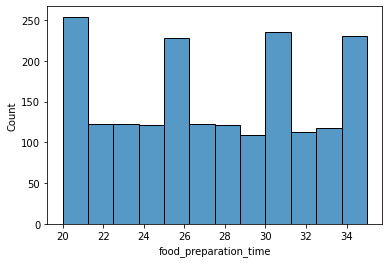

In [140]:
sns.boxplot(data=df,x='food_preparation_time')
plt.show()
sns.histplot(data=df,x='food_preparation_time')
plt.show()
#Shows the median, quartiles, and the spread for the food prepartion time
#Median is around 27 minutes with lower quartile and 23 and upper at 31. Ranging from 20 to 36 minutes
#Histogram shows the frequency of food preparation time. Mainly uniform with some peaks here and there

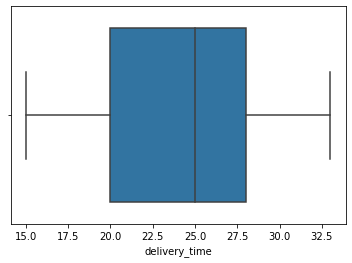

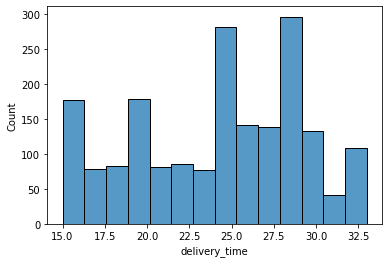

In [139]:
sns.boxplot(data=df,x='delivery_time') 
plt.show()
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
#Box plot suggests median delivery time is 25 minutes. First quartile is around 20 and third is around 28
#Histogram suggets delivery times 25 and 28 minutes occur the most

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [40]:
# Write the code here
df['restaurant_name'].value_counts().head()
#Shake Shack                  219
#The Meatball Shop            132
#Blue Ribbon Sushi            119
#Blue Ribbon Fried Chicken     96
#Parm                          68

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [46]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()
#American is the most popular cuisine on weekends

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [56]:
# Write the code here
df_20 = df[df['cost_of_the_order']>20]
answer = df_20['cost_of_the_order'].value_counts().sum()
(answer/1898) *100
29.2 % orders cost more than $20

29.24130663856691

#### Observations:


### **Question 10**: What is the mean order delivery time?

In [60]:
# Write the code here
df['delivery_time'].mean()
#mean order delivery time is 24.16 mins

24.161749209694417

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [63]:
# Write the code here
df['customer_id'].value_counts().head(3)
#Customer ids are 52832,47440,83287 of top 3 customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

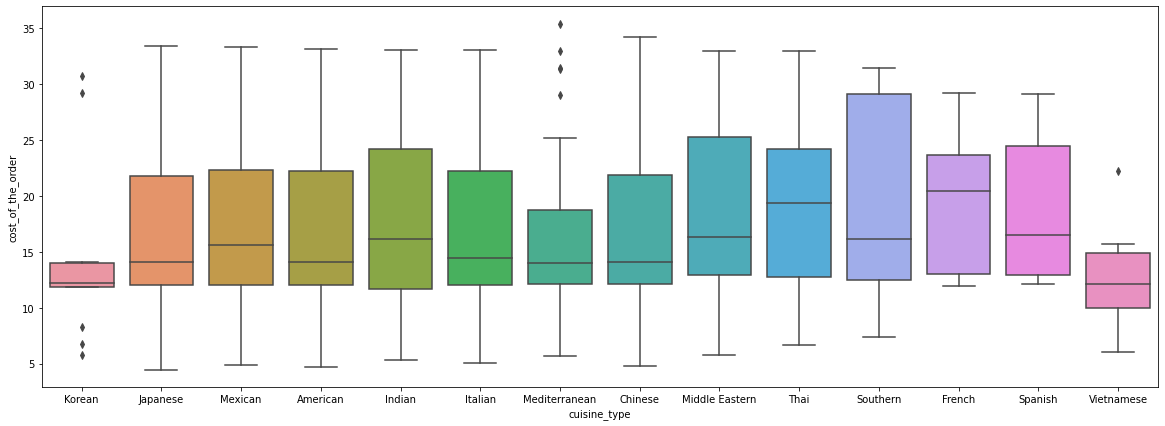

In [158]:
#Cuisine vs Cost of the Order Box plots
plt.figure(figsize=(20,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.show()

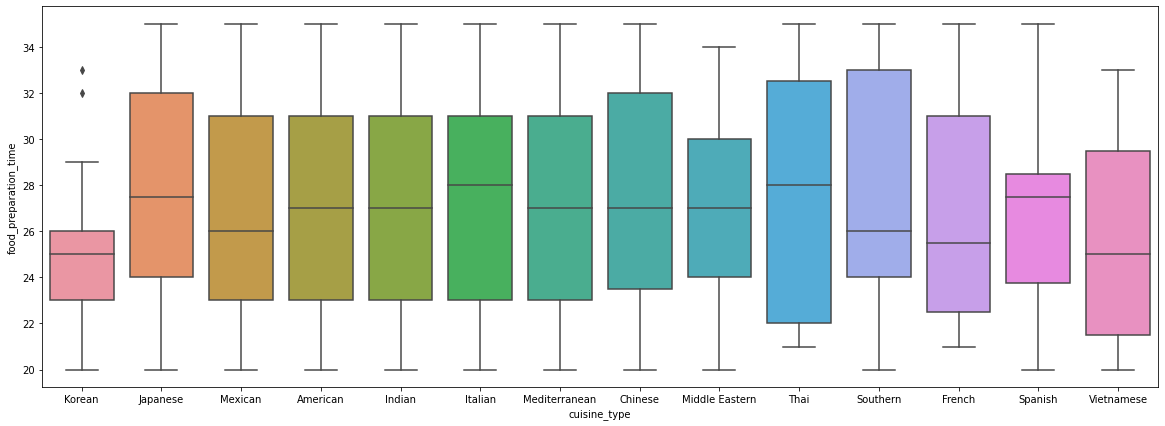

In [161]:
#Cuisine vs Food Preparation time
plt.figure(figsize=(20,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.show()

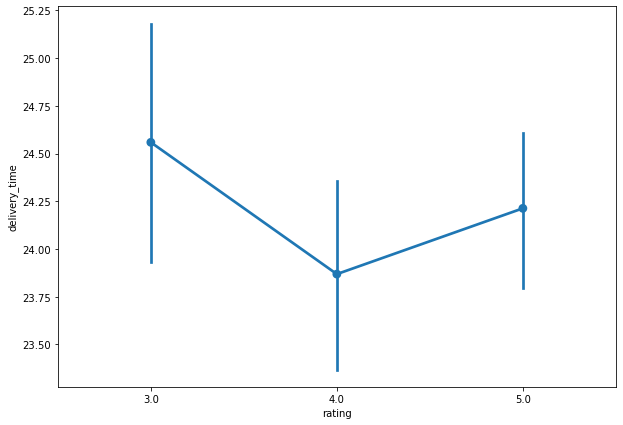

In [167]:
# Relationship between rating and delivery time
plt.figure(figsize=(10, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

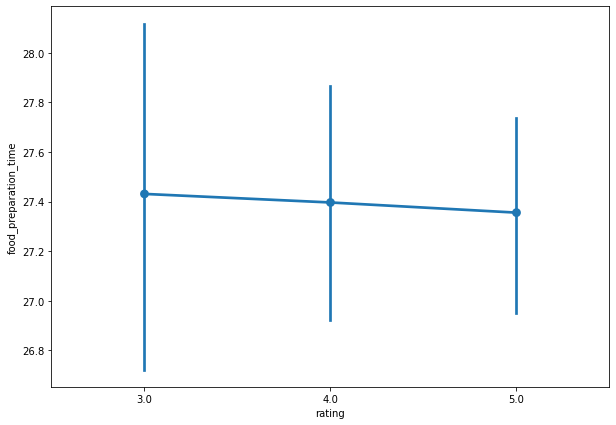

In [166]:
# Relationship between rating and food preparation time
plt.figure(figsize=(10, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

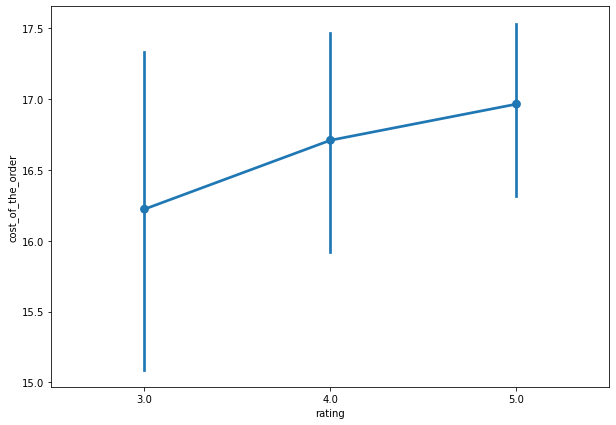

In [165]:
# Relationship between rating and cost of the order
plt.figure(figsize=(10, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)  ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [145]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'restaurant_name' to calculate count and average of ratings
rating_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filtering restaurants with more than 50 ratings and average rating greater than 4
eligible_restaurants = rating_stats[(rating_stats['count'] > 50) & (rating_stats['mean'] > 4)]

# Resetting the index to get 'restaurant_name' as a column
eligible_restaurants.reset_index(inplace=True)
eligible_restaurants[['restaurant_name', 'count', 'mean']]
#Blue Ribbon Fried Chicken
#Blue Ribbon Sushi
#Shake Shack
#The Meatball Shop

,restaurant_name,count,mean
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [147]:
# Write the code here
#Define a function to calculate the revenue per order
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to the 'cost_of_the_order' column to calculate revenue for each order
df['company_revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total net revenue
total_revenue = df['company_revenue'].sum()
total_revenue
#Total revenue is $6166.3

6166.303

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [120]:
# Write the code here
new = (df['food_preparation_time']+df['delivery_time']) >60
new.value_counts()
#There are 200 orders that take more than 60 minutes. That is (200/1898)*100 = 10.5% orders 



False    1698
True      200
dtype: int64

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [86]:
# Write the code here

df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
#Average Delivery time duriung the week is 28.3 minutes

28.340036563071298

In [88]:
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
#Average Delivery time during the weekend is 22.47 which is lower than the week

22.4700222057735

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
#I believe that there is a trend of restaurants what people seem to prefer. Many businesses need to change how they run to 
attract more customer. Cost,Food preparation time, delivery time, on weekend and weekdays are all things to be considered. 

Targeted Promotion for Higher Cost items -Items that cost $20 or more generate 25% of the revenue. -Identify high-cost, fast-delivery items that already receive the highest ratings. -Create combo meals or premium bundles priced above $20 that would encourage larger purchases.

Streamline Delivery Operations: -The data shows that weekday delivery times average 28.3 minutes vs 22.47 minutes on weekends. -Hire more delivery staff or optimize delivery routes, especially for weekdays, to reduce wait times and enhance customer experience. -Use demand forecasting to anticipate periods with high demands and allocate resources accordingly.

Changes in Thai Cuisine -Average Cost of Order and average food preparation time are both high for Thai food compared to others. -Negotiate better prices with supplier or change lead times for food delivery to reduce logistic costs.

---